## Question 2

Create labeled surrogate data sets. Perform a PCA/Class prediction with ovr logistic regression analysis as developed in the lecture.

(a) 4 blobs: Create clearly separable 4-blobs in 3d but also a ’disaster’realization with strong overlaps. Study, show and compare elbow plots and prediction boundaries.

(b) 2 touching parabola spreads as shown in the lecture, but in 3d (not2d). Study and show elbow plot and prediction boundaries.

## Four Blobs

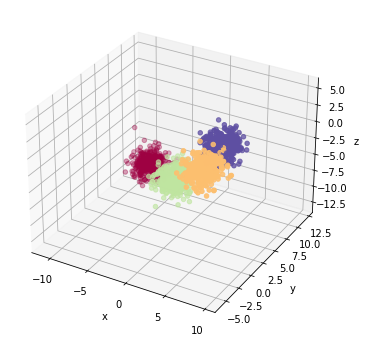

In [71]:
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.datasets import make_blobs
# from matplotlib import pyplot
# from pandas import DataFrame

# X, y = make_blobs(n_samples=1500, centers=4, n_features=10)

# xdata=X[:,0]
# ydata=X[:,5]
# zdata=X[:,7]

# color = y
# cmap = plt.get_cmap('Spectral')

# fig = plt.figure(figsize=(9, 6))
# # Create 3D container
# ax = plt.axes(projection = '3d')
# # Visualize 3D scatter plot
# ax.scatter3D(xdata, ydata, zdata,c=color, cmap=cmap )
# # Give labels
# ax.set_xlabel('x')
# ax.set_ylabel('y')
# ax.set_zlabel('z')
# # Save figure
# plt.show()

**Elbow**

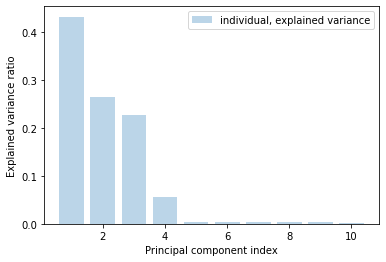

In [63]:
import pandas as pd
from sklearn.datasets import make_blobs
from numpy import mean
from numpy import std
from numpy.random import randn
from numpy.random import seed
from numpy import cov
from scipy.stats import pearsonr 
from matplotlib import pyplot
from matplotlib.colors import ListedColormap
import sympy as sympy
import numpy as np
from scipy import *
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from IPython.display import display, Math, Latex
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

# Read out samples (X) and labels (y) 
X, y = make_blobs(n_samples=1500, centers=4, n_features=10)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)

# Standardize the features (zero mean, unit variance) 
sc = StandardScaler()

# Fit results must be used later (mu and sigma)
X_train_std = sc.fit_transform(X_train) 

# Normalize test data set with mu/sigma of training data
X_test_std = sc.transform(X_test)

# Compute covariance matrix and eigenvalues (EVal) / eigenvectors (EVec)

cov_mat = np.cov(X_train_std.T)
EVal, EVec = np.linalg.eig(cov_mat)

# Calculate (sum of) explained variances
sum_EVal = np.sum(EVal)
var_exp = [(i / sum_EVal) for i in sorted(EVal, reverse=True)]

# Plot explained variances
plt.bar(range(1,11), var_exp, alpha=0.3, align='center', label='individual, explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

In [67]:
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(EVal[i]), EVec[:, i]) for i in range(len(EVal))]

# Sort the (EVal, EVec) tuples from high to low (reverse), key=EV
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

w = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis], eigen_pairs[2][1][:, np.newaxis]))

X_train_pca = X_train_std.dot(w)

In [68]:
X_train_pca.shape

(1050, 3)

**Visualization**

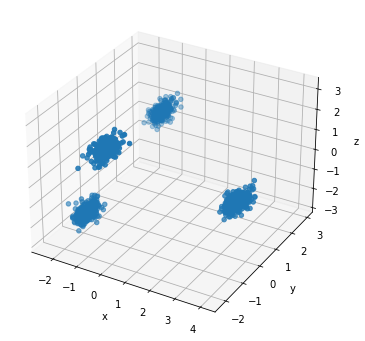

In [84]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from matplotlib import pyplot
from pandas import DataFrame

xdata=X_train_pca[:,0]
ydata=X_train_pca[:,1]
zdata=X_train_pca[:,2]

#color = y
#cmap = plt.get_cmap('Spectral')

fig = plt.figure(figsize=(9, 6))
# Create 3D container
ax = plt.axes(projection = '3d')
# Visualize 3D scatter plot
ax.scatter3D(xdata, ydata, zdata)
# Give labels
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
# Save figure
plt.show()

**PCA and Logistic**

In [76]:
# Set up PCA and logistic regression model
pca = PCA(n_components=3)
lr = LogisticRegression(multi_class='ovr', solver='liblinear')

# Fit and transform training data, given on PCA reduction to k(=3) principle components
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

lr.fit(X_train_pca, y_train) 

LogisticRegression(multi_class='ovr', solver='liblinear')

**3D-decision-boundary**

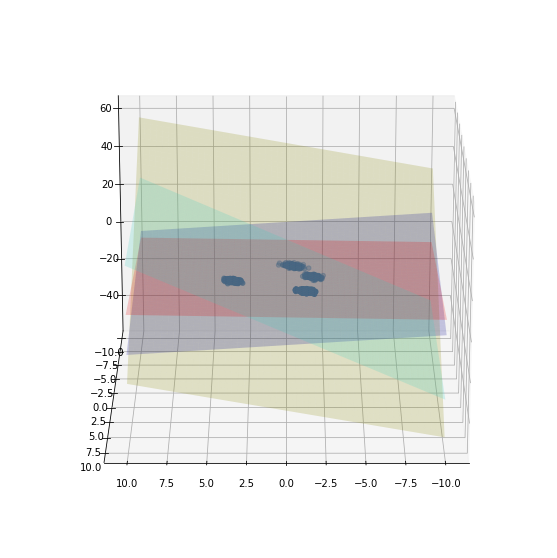

In [130]:
fig = plt.figure(figsize=(10,10))
ax  = fig.add_subplot(111, projection='3d')

#plot the blobs
xdata=X_train_pca[:,0]
ydata=X_train_pca[:,1]
zdata=X_train_pca[:,2]
ax.scatter3D(xdata, ydata, zdata)

#plot decision boundary
clf = lr.fit(X_train_pca, y_train) 
z1 = lambda x,y: (-clf.intercept_[0]-clf.coef_[0][0]*x -clf.coef_[0][1]*y) / clf.coef_[0][2]
z2 = lambda x,y: (-clf.intercept_[1]-clf.coef_[1][0]*x -clf.coef_[1][1]*y) / clf.coef_[1][2]
z3 = lambda x,y: (-clf.intercept_[2]-clf.coef_[2][0]*x -clf.coef_[2][1]*y) / clf.coef_[2][2]
z4 = lambda x,y: (-clf.intercept_[3]-clf.coef_[3][0]*x -clf.coef_[3][1]*y) / clf.coef_[3][2]

tmp = np.linspace(-10,10,50)
x,y = np.meshgrid(tmp,tmp)


ax.plot_surface(x, y, z1(x,y),alpha=0.2,color = 'blue')
ax.plot_surface(x, y, z2(x,y),alpha=0.2,color = 'yellow')
ax.plot_surface(x, y, z3(x,y),alpha=0.2,color = 'red')
ax.plot_surface(x, y, z4(x,y),alpha=0.2,color = 'turquoise')
ax.view_init(20, 90) # rotation


plt.show()

## Touching Parabola

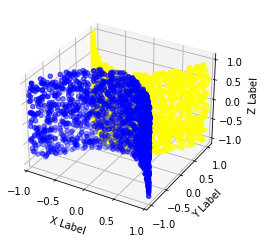

In [4]:
# from mpl_toolkits.mplot3d import Axes3D
# import matplotlib.pyplot as plt


# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')

# xs = np.random.uniform(-1, 1,1500)
# ys = xs**2
# zs = np.random.uniform(-1, 1,1500)


# xt = np.random.uniform(-1, 1,1500)
# yt = - xt**2
# zt = np.random.uniform(-1, 1,1500)

# ax.scatter(xs, ys, zs, c='yellow', marker='o')
# ax.scatter(xt, yt, zt, c='blue', marker='o')

# ax.set_xlabel('X Label')
# ax.set_ylabel('Y Label')
# ax.set_zlabel('Z Label')

# plt.xlim(-1, 1)
# plt.show()

In [140]:
df[df.columns[0:3]].values.shape

(3000, 3)

In [141]:
df[df.columns[3]].values.shape

(3000,)

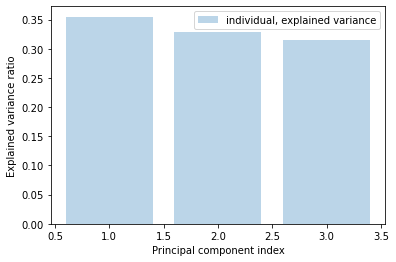

In [142]:
# Read out samples (X) and labels (y) 
xs = np.random.uniform(-1, 1,1500)
ys = xs**2
zs = np.random.uniform(-1, 1,1500)
label_s = np.ones(1500)*1

xt = np.random.uniform(-1, 1,1500)
yt = - xt**2
zt = np.random.uniform(-1, 1,1500)
label_t = np.zeros(1500)*1

dict = {"x":np.hstack((xs,xt)),
        "y":np.hstack((ys,yt)),
        "z":np.hstack((zs,zt)),
        "label":np.hstack((label_s,label_t))
}

df = pd.DataFrame(dict)

X = df[df.columns[0:3]].values
y = df[df.columns[3]].values

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)

# Standardize the features (zero mean, unit variance) 
sc = StandardScaler()

# Fit results must be used later (mu and sigma)
X_train_std = sc.fit_transform(X_train) 

# Normalize test data set with mu/sigma of training data
X_test_std = sc.transform(X_test)

# Compute covariance matrix and eigenvalues (EVal) / eigenvectors (EVec)

cov_mat = np.cov(X_train_std.T)
EVal, EVec = np.linalg.eig(cov_mat)

# Calculate (sum of) explained variances
sum_EVal = np.sum(EVal)
var_exp = [(i / sum_EVal) for i in sorted(EVal, reverse=True)]

# Plot explained variances
plt.bar(range(1,4), var_exp, alpha=0.3, align='center', label='individual, explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

In [144]:
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(EVal[i]), EVec[:, i]) for i in range(len(EVal))]

# Sort the (EVal, EVec) tuples from high to low (reverse), key=EV
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

w = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))

X_train_pca = X_train_std.dot(w)

In [145]:
X_train_pca.shape

(2100, 2)

## Using pyplot

In [6]:
import pandas as pd 
import plotly.express as px  
import plotly.io as pio
import numpy as np
import plotly.graph_objects as go

# Use for animation rotation at the end
x_eye = -1.25
y_eye = 2
z_eye = 0.5


X, y = make_blobs(n_samples=2000, centers=4, n_features=3)

xdata=X[:,0]
ydata=X[:,1]
zdata=X[:,2]


dict = {"x":xdata,
        "y":ydata,
        "z":zdata,
        "label":y
}

df = pd.DataFrame(dict)

fig = px.scatter_3d(
    df,
    x='x',
    y='y',
    z='z',
    color="label",
    #color_discrete_sequence=['magenta', 'green','blue','yellow'],
    color_discrete_map={'1': 'black', '2': 'yellow', '3':'red', '0':'green'},
    opacity=0.7,              # opacity values range from 0 to 1
    log_x=True,  # you can also set log_y and log_z as a log scale
    # range_z=[9,13],           # you can also set range of range_y and range_x
    template='plotly',         # 'ggplot2', 'seaborn', 'simple_white', 'plotly',
                                # 'plotly_white', 'plotly_dark', 'presentation',
                                # 'xgridoff', 'ygridoff', 'gridon', 'none'
    title="Four Blobs",
    labels={'Different Clusters'},
    height=700)           # height of graph in pixels


pio.show(fig)

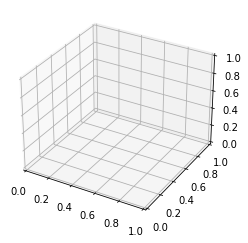

In [7]:
import pandas as pd 
import plotly.express as px  
import plotly.io as pio
import numpy as np
import plotly.graph_objects as go

# Use for animation rotation at the end
x_eye = -1.25
y_eye = 2
z_eye = 0.5


fig = plt.figure()
#ax = fig.add_subplot(111, projection='3d')

xs = np.random.uniform(-1, 1,1500)
ys = xs**2
zs = np.random.uniform(-1, 1,1500)
label_s = np.ones(1500)*1

xt = np.random.uniform(-1, 1,1500)
yt = - xt**2
zt = np.random.uniform(-1, 1,1500)
label_t = np.zeros(1500)*1

dict = {"x":np.hstack((xs,xt)),
        "y":np.hstack((ys,yt)),
        "z":np.hstack((zs,zt)),
        "label":np.hstack((label_s,label_t))
}

df = pd.DataFrame(dict)


fig = px.scatter_3d(
    df,
    x='x',
    y='y',
    z='z',
    color="label",
    #color_discrete_sequence=['magenta', 'green','blue','yellow'],
    #color_discrete_map={'1': 'black', '2': 'yellow', '3':'red', '0':'green'},
    opacity=0.7,              # opacity values range from 0 to 1
    #log_x=True,  # you can also set log_y and log_z as a log scale
    # range_z=[9,13],           # you can also set range of range_y and range_x
    template='plotly',         # 'ggplot2', 'seaborn', 'simple_white', 'plotly',
                                # 'plotly_white', 'plotly_dark', 'presentation',
                                # 'xgridoff', 'ygridoff', 'gridon', 'none'
#     title="Four Blobs",
#     labels={'Different Clusters'},
    height=700)           # height of graph in pixels


pio.show(fig)